In [1]:
import importlib
import plots
importlib.reload(plots)

import statistics

from marketenvironment import MarketEnvironment
from simulation import run_episode

# RL-Environment

In [2]:
sim_env = MarketEnvironment(num_agents=5, costs=5, sigma=2)
steps = 8000
print(f"Running simulation for {steps} steps...")
sim_env, round_info, q_snapshots, snap_steps = run_episode(sim_env=sim_env, max_steps=steps)

Running simulation for 8000 steps...


Varianz oder Standardabweichung der Rewards

In [3]:
inner_dict = round_info[0]
rz_keys = [key for key in inner_dict.keys() if key.startswith("RZ")]
steps = sorted(round_info.keys())

rewards = {}

for rz in rz_keys:
    rewards = [round_info[s][rz] for s in steps]
    mean = statistics.mean(rewards)
    varianz = statistics.variance(rewards)
    stdev = statistics.stdev(rewards)
    print(rz, "Mean", mean, "Varianz", varianz, "Standardabweichung", stdev)

RZ1 Mean 3.461125 Varianz 11.143506672709089 Standardabweichung 3.338189130757736
RZ2 Mean 3.49140625 Varianz 11.65395320411145 Standardabweichung 3.4137886876769996
RZ3 Mean 3.4564375 Varianz 11.453237088229779 Standardabweichung 3.3842631529226237
RZ4 Mean 3.431 Varianz 11.613362545318164 Standardabweichung 3.407838397770376
RZ5 Mean 3.42653125 Varianz 11.178851261681148 Standardabweichung 3.3434789159917173


Unterschiede beim Mean Reward liegen bei < 0.07.

Interpretation:
- Kein Agent dominiert langfristig
- Keine systematische Benachteiligung
- Dein Mechanismus ist symmetrisch / fair

Standardabweichung $`\sigma`$ ~ 3.3–3.5

Verglichen mit dem Mittelwert ($`\mu`$~3.45):

$`\frac{\sigma}{\mu}`$~1

=> Die Rewards schwanken stark von Runde zu Runde.

a) Kosten sind zufällig
- Kosten ~ Normal(5, 2), abgeschnitten auf [1, 10]
- Jede Runde komplett neue Realisation
- → Einkommen stark zufallsgetrieben

b) Marktpreis schwankt
- Preis = ⌈Mittelwert der aktuellen Kosten⌉
- → Preis variiert ebenfalls zufällig
- → Earnings = Preis − Kosten ist volatil

c) Wettbewerb & Bieten
- Ob du gewinnst / verlierst ist stochastisch
- Selbst bei gleicher Strategie

Warum Mean positive (~3.4)?

Erwartungswert grob:
- Kostenmittel: 5
- Marktpreis: ≈ 5–6 (ceil des Mittels)
- Earnings ≈ 0–1 pro Job
- Durch Bieten / Marktmechanismus kommt zusätzlicher Gewinn

👉 Der Markt erzeugt systematisch positiven Überschuss für Agenten.

Das bedeutet:
- Das System ist nicht „zero-sum“
- Es gibt positive soziale Wohlfahrt

Marktpreise

In [4]:
avg_bid = [v["avg_bid"] for v in round_info.values()]
total_bids = [v["total_bids"] for v in round_info.values()]

In [17]:
statistics.mean(avg_bid)

1.035515625

In [15]:
statistics.mean(total_bids)

1.77946875

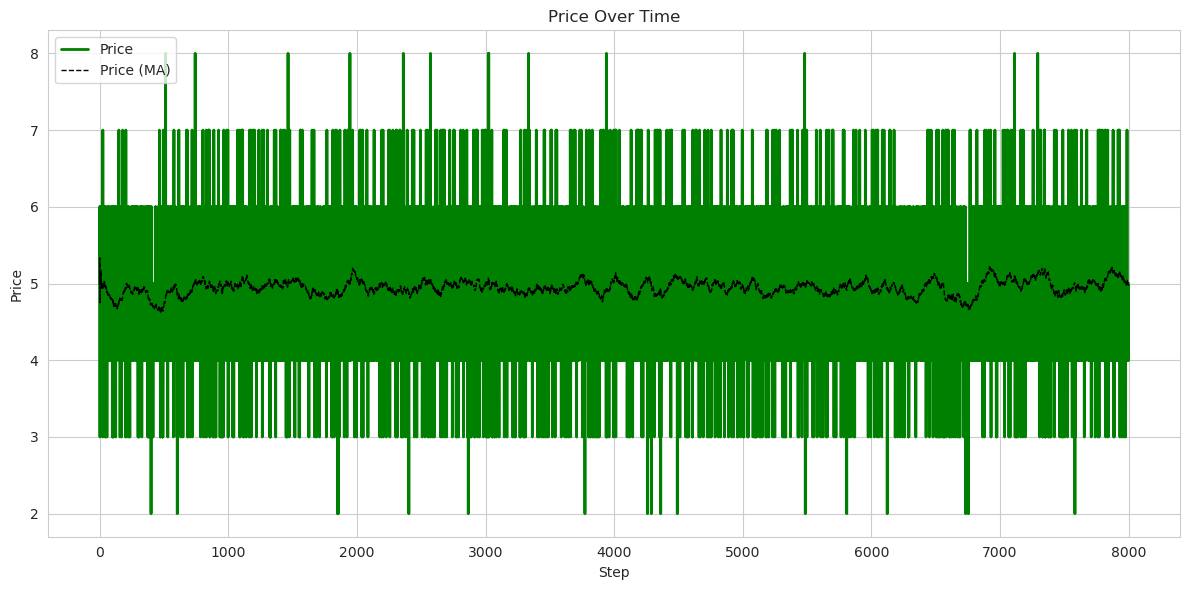

In [5]:
plots.plot_price(round_info)

Plotting Q-Tables
Agent RZ1


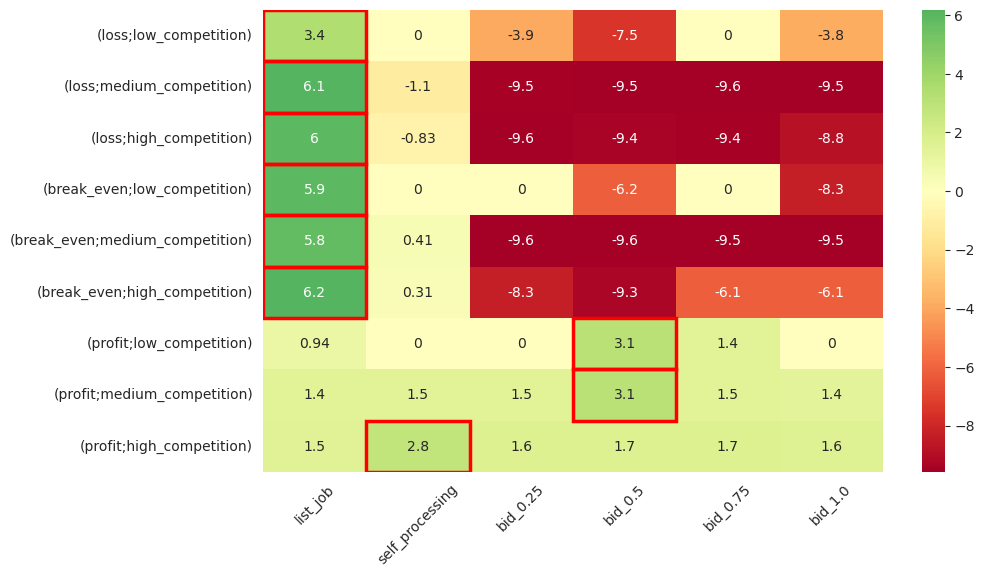

Agent RZ2


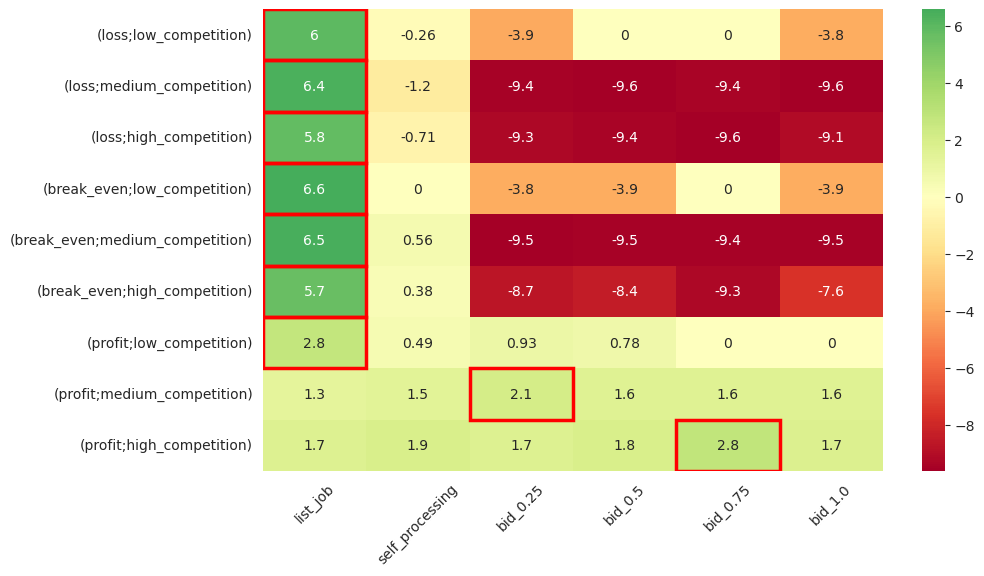

Agent RZ3


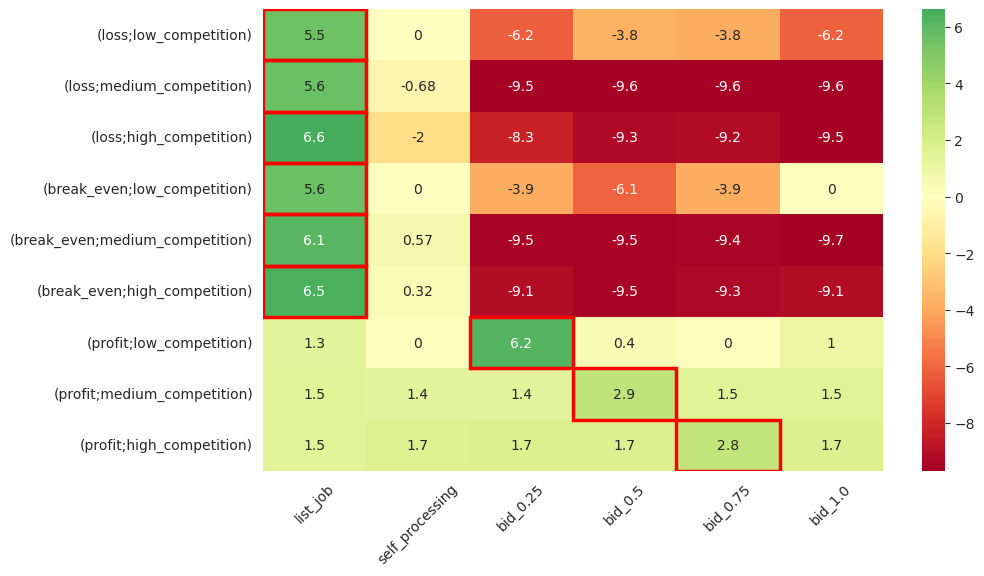

Agent RZ4


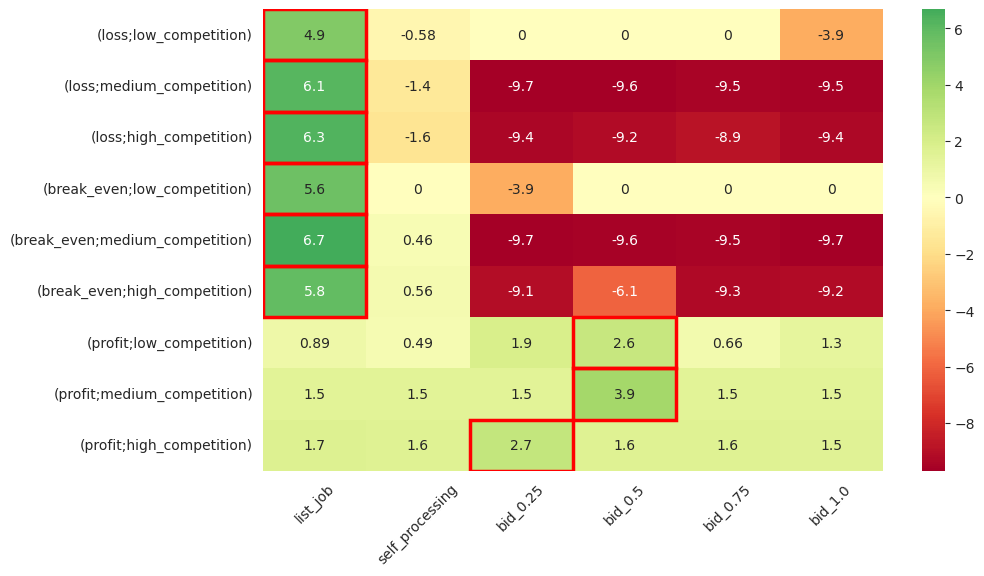

Agent RZ5


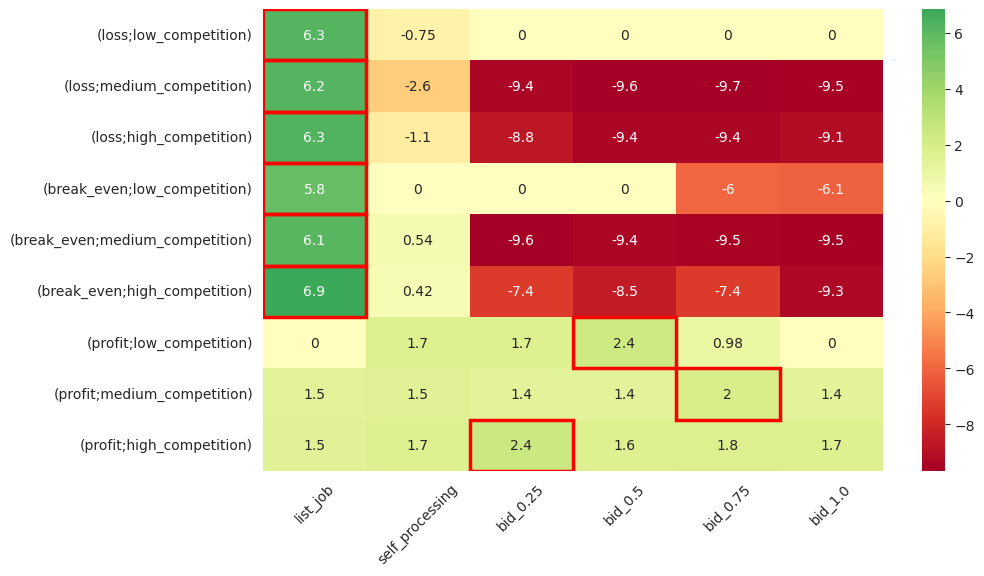

In [6]:
print("Plotting Q-Tables")
for agent in sim_env.agents.values():
    print(f"Agent {agent.name}")
    plots.plot_q_tables(agent)

Plotting Rewards


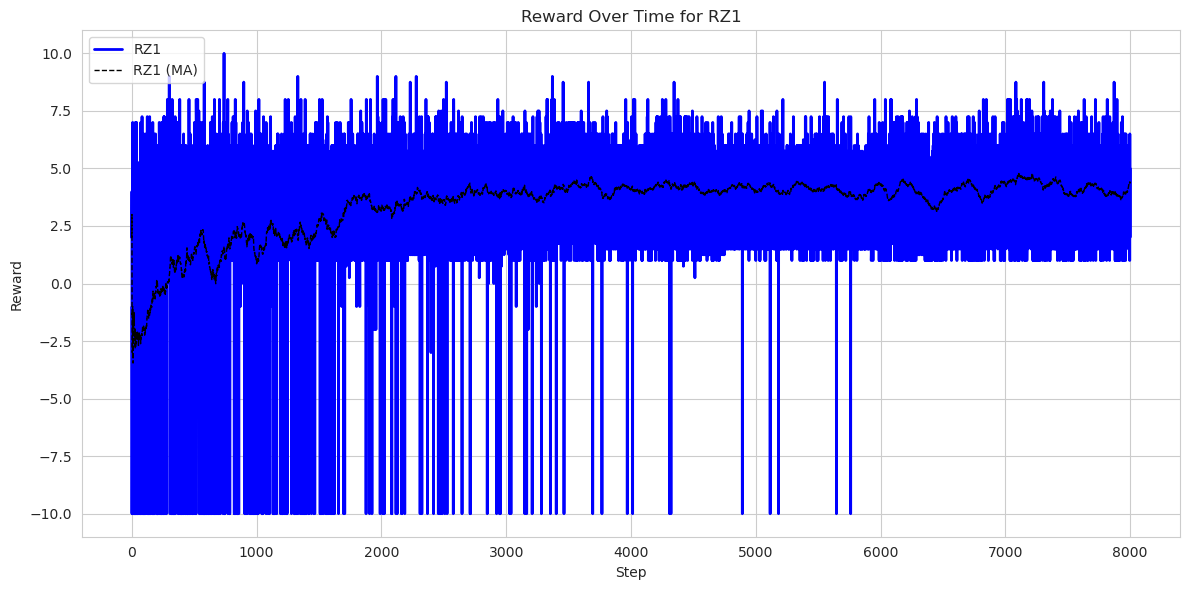

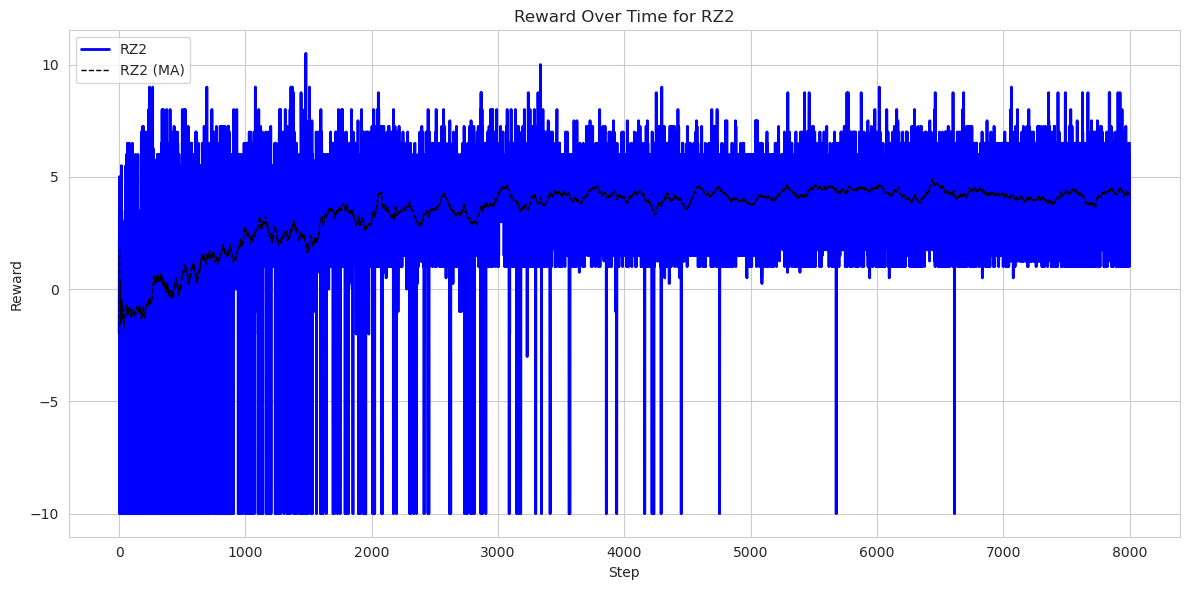

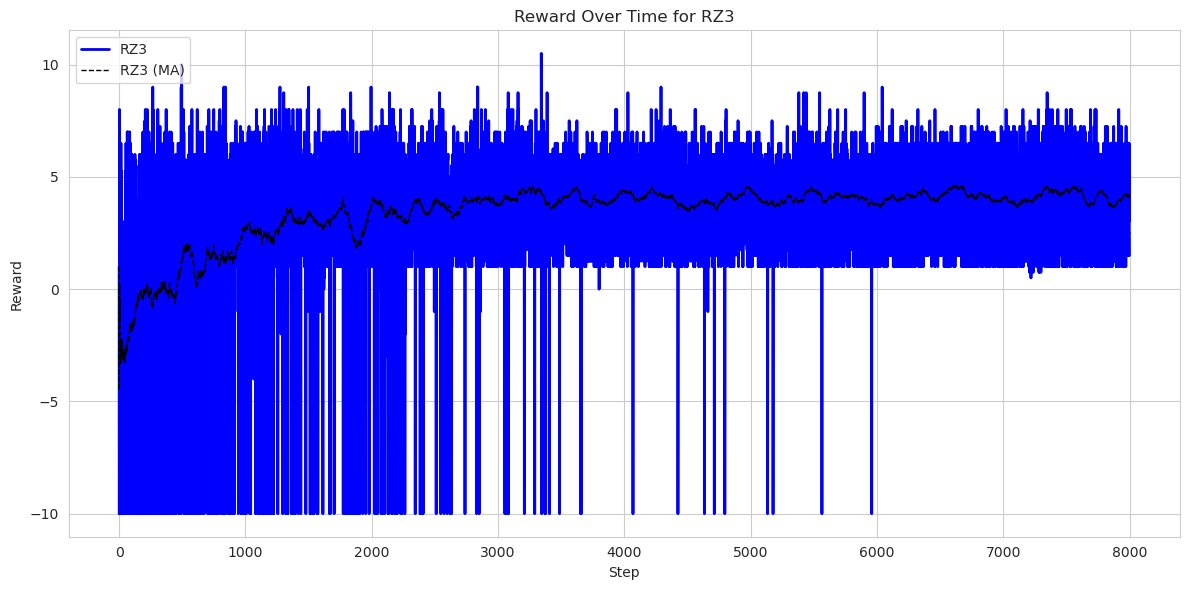

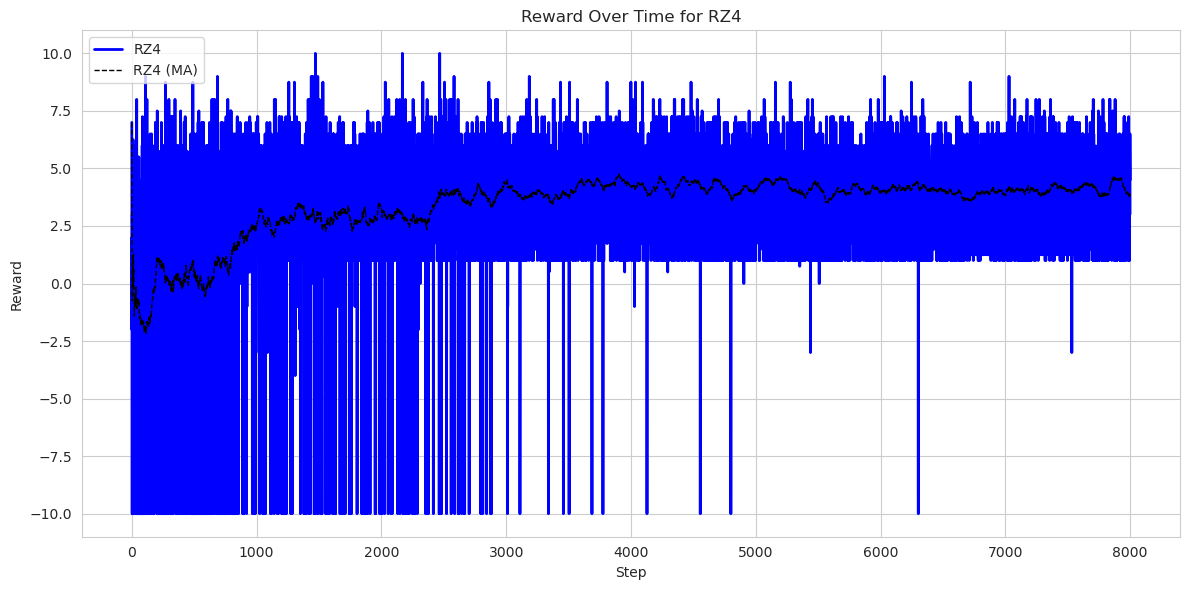

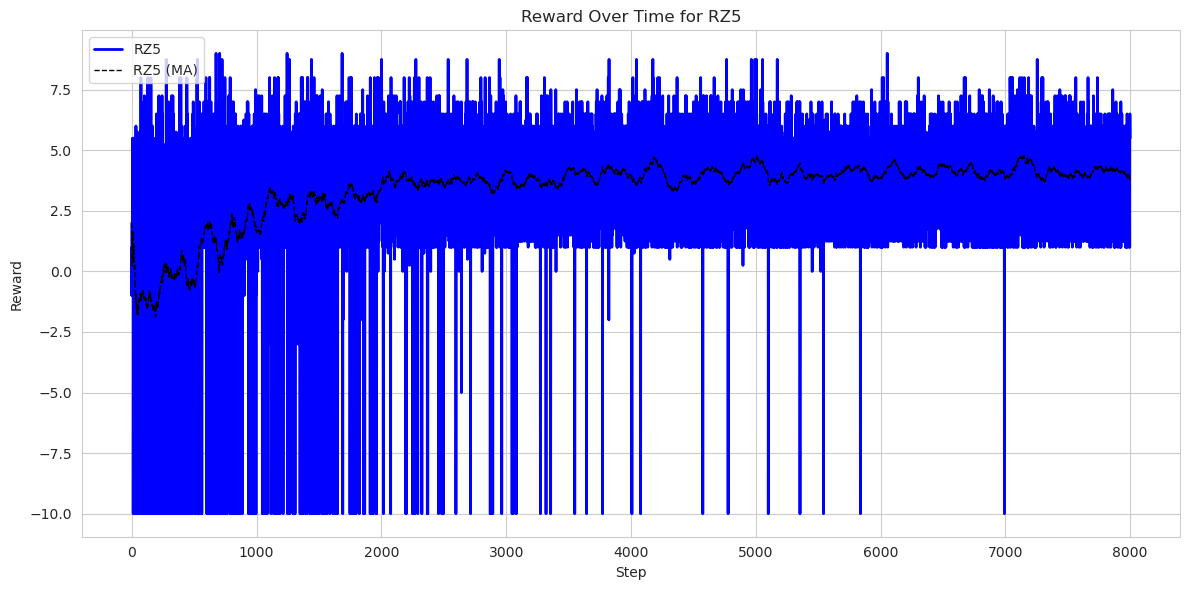

In [7]:
print("Plotting Rewards")
for agent in sim_env.agents.values():
    plots.plot_reward_for(agent.name, round_info)

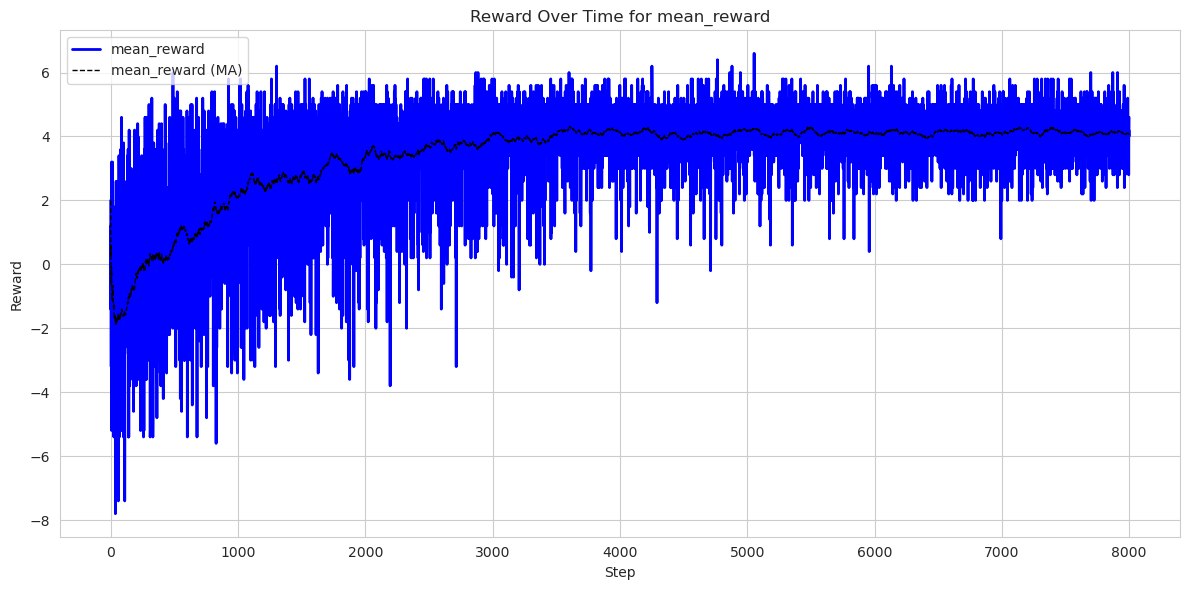

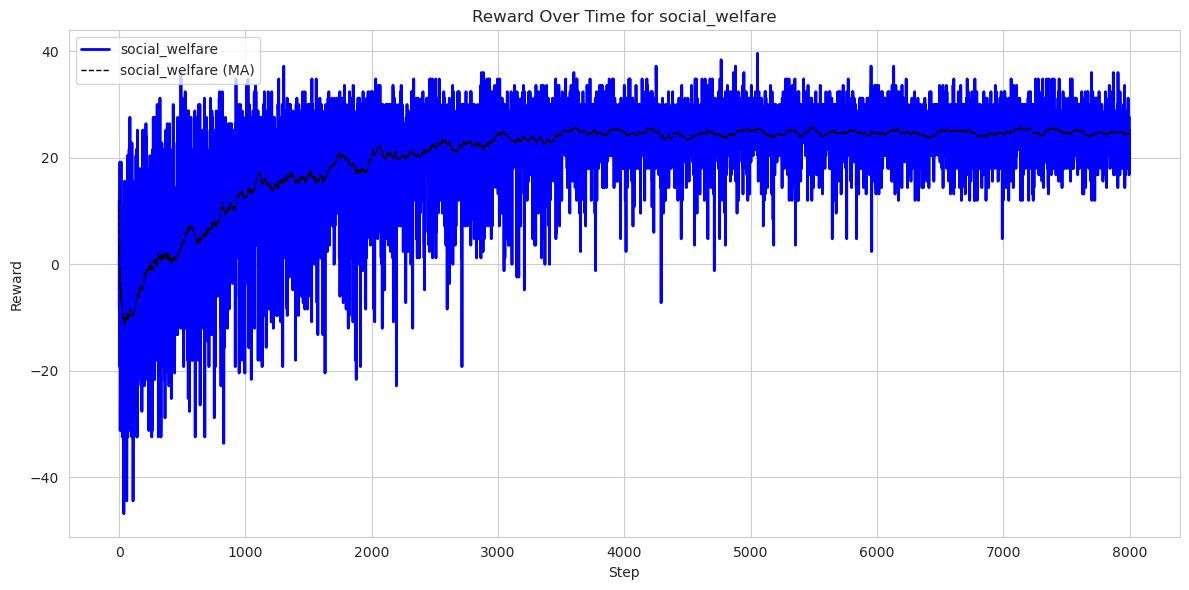

In [8]:
plots.plot_reward_for("mean_reward", round_info)
plots.plot_reward_for("social_welfare", round_info)

Plotting Cumulative Rewards


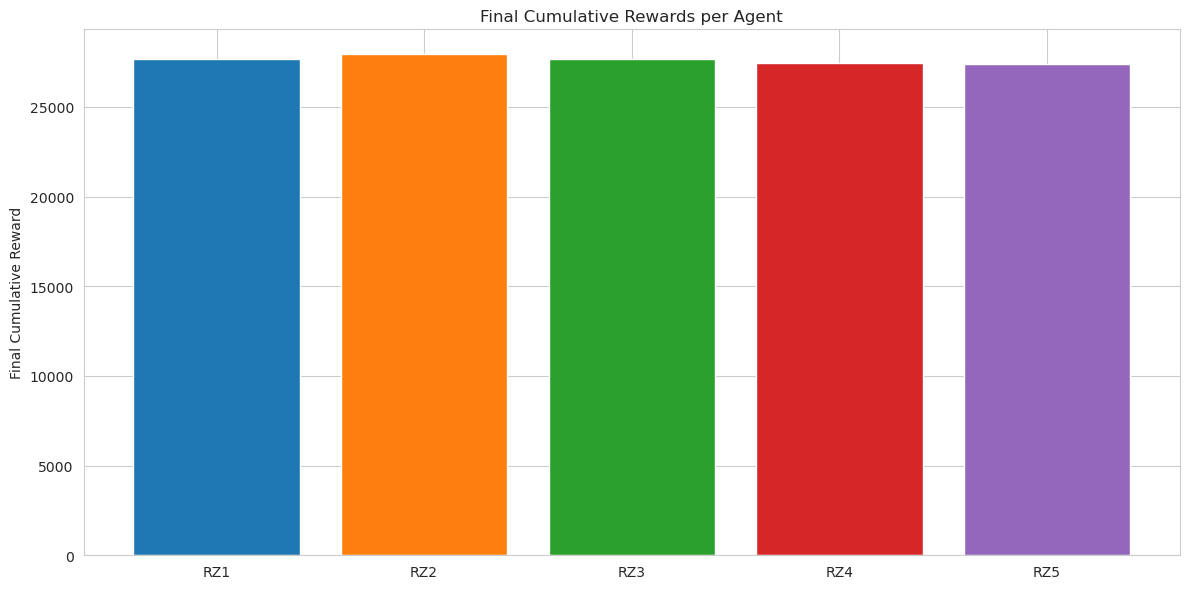

In [9]:
print("Plotting Cumulative Rewards")
plots.plot_cumulative_rewards(round_info)

Plotting Q-Table Convergance


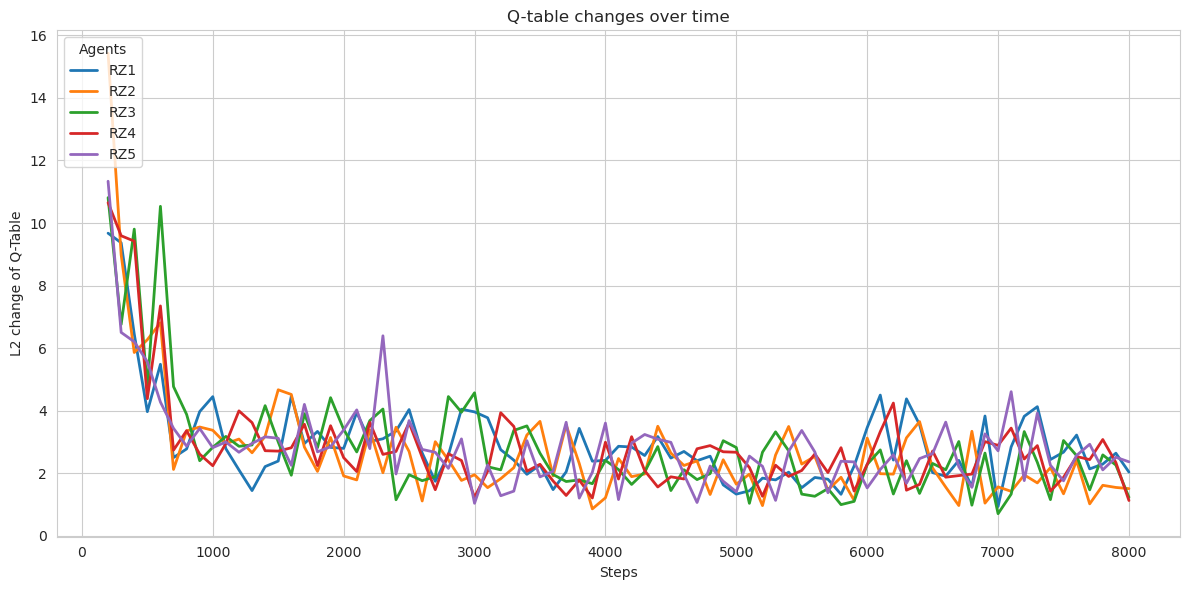

In [10]:
print("Plotting Q-Table Convergance")
plots.plot_q_convergance(q_snapshots, snap_steps)